<a href="https://colab.research.google.com/github/felipeodorcyk/Data_Science_Portfolio/blob/main/TelecomUsers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Churn in Telecom Users**



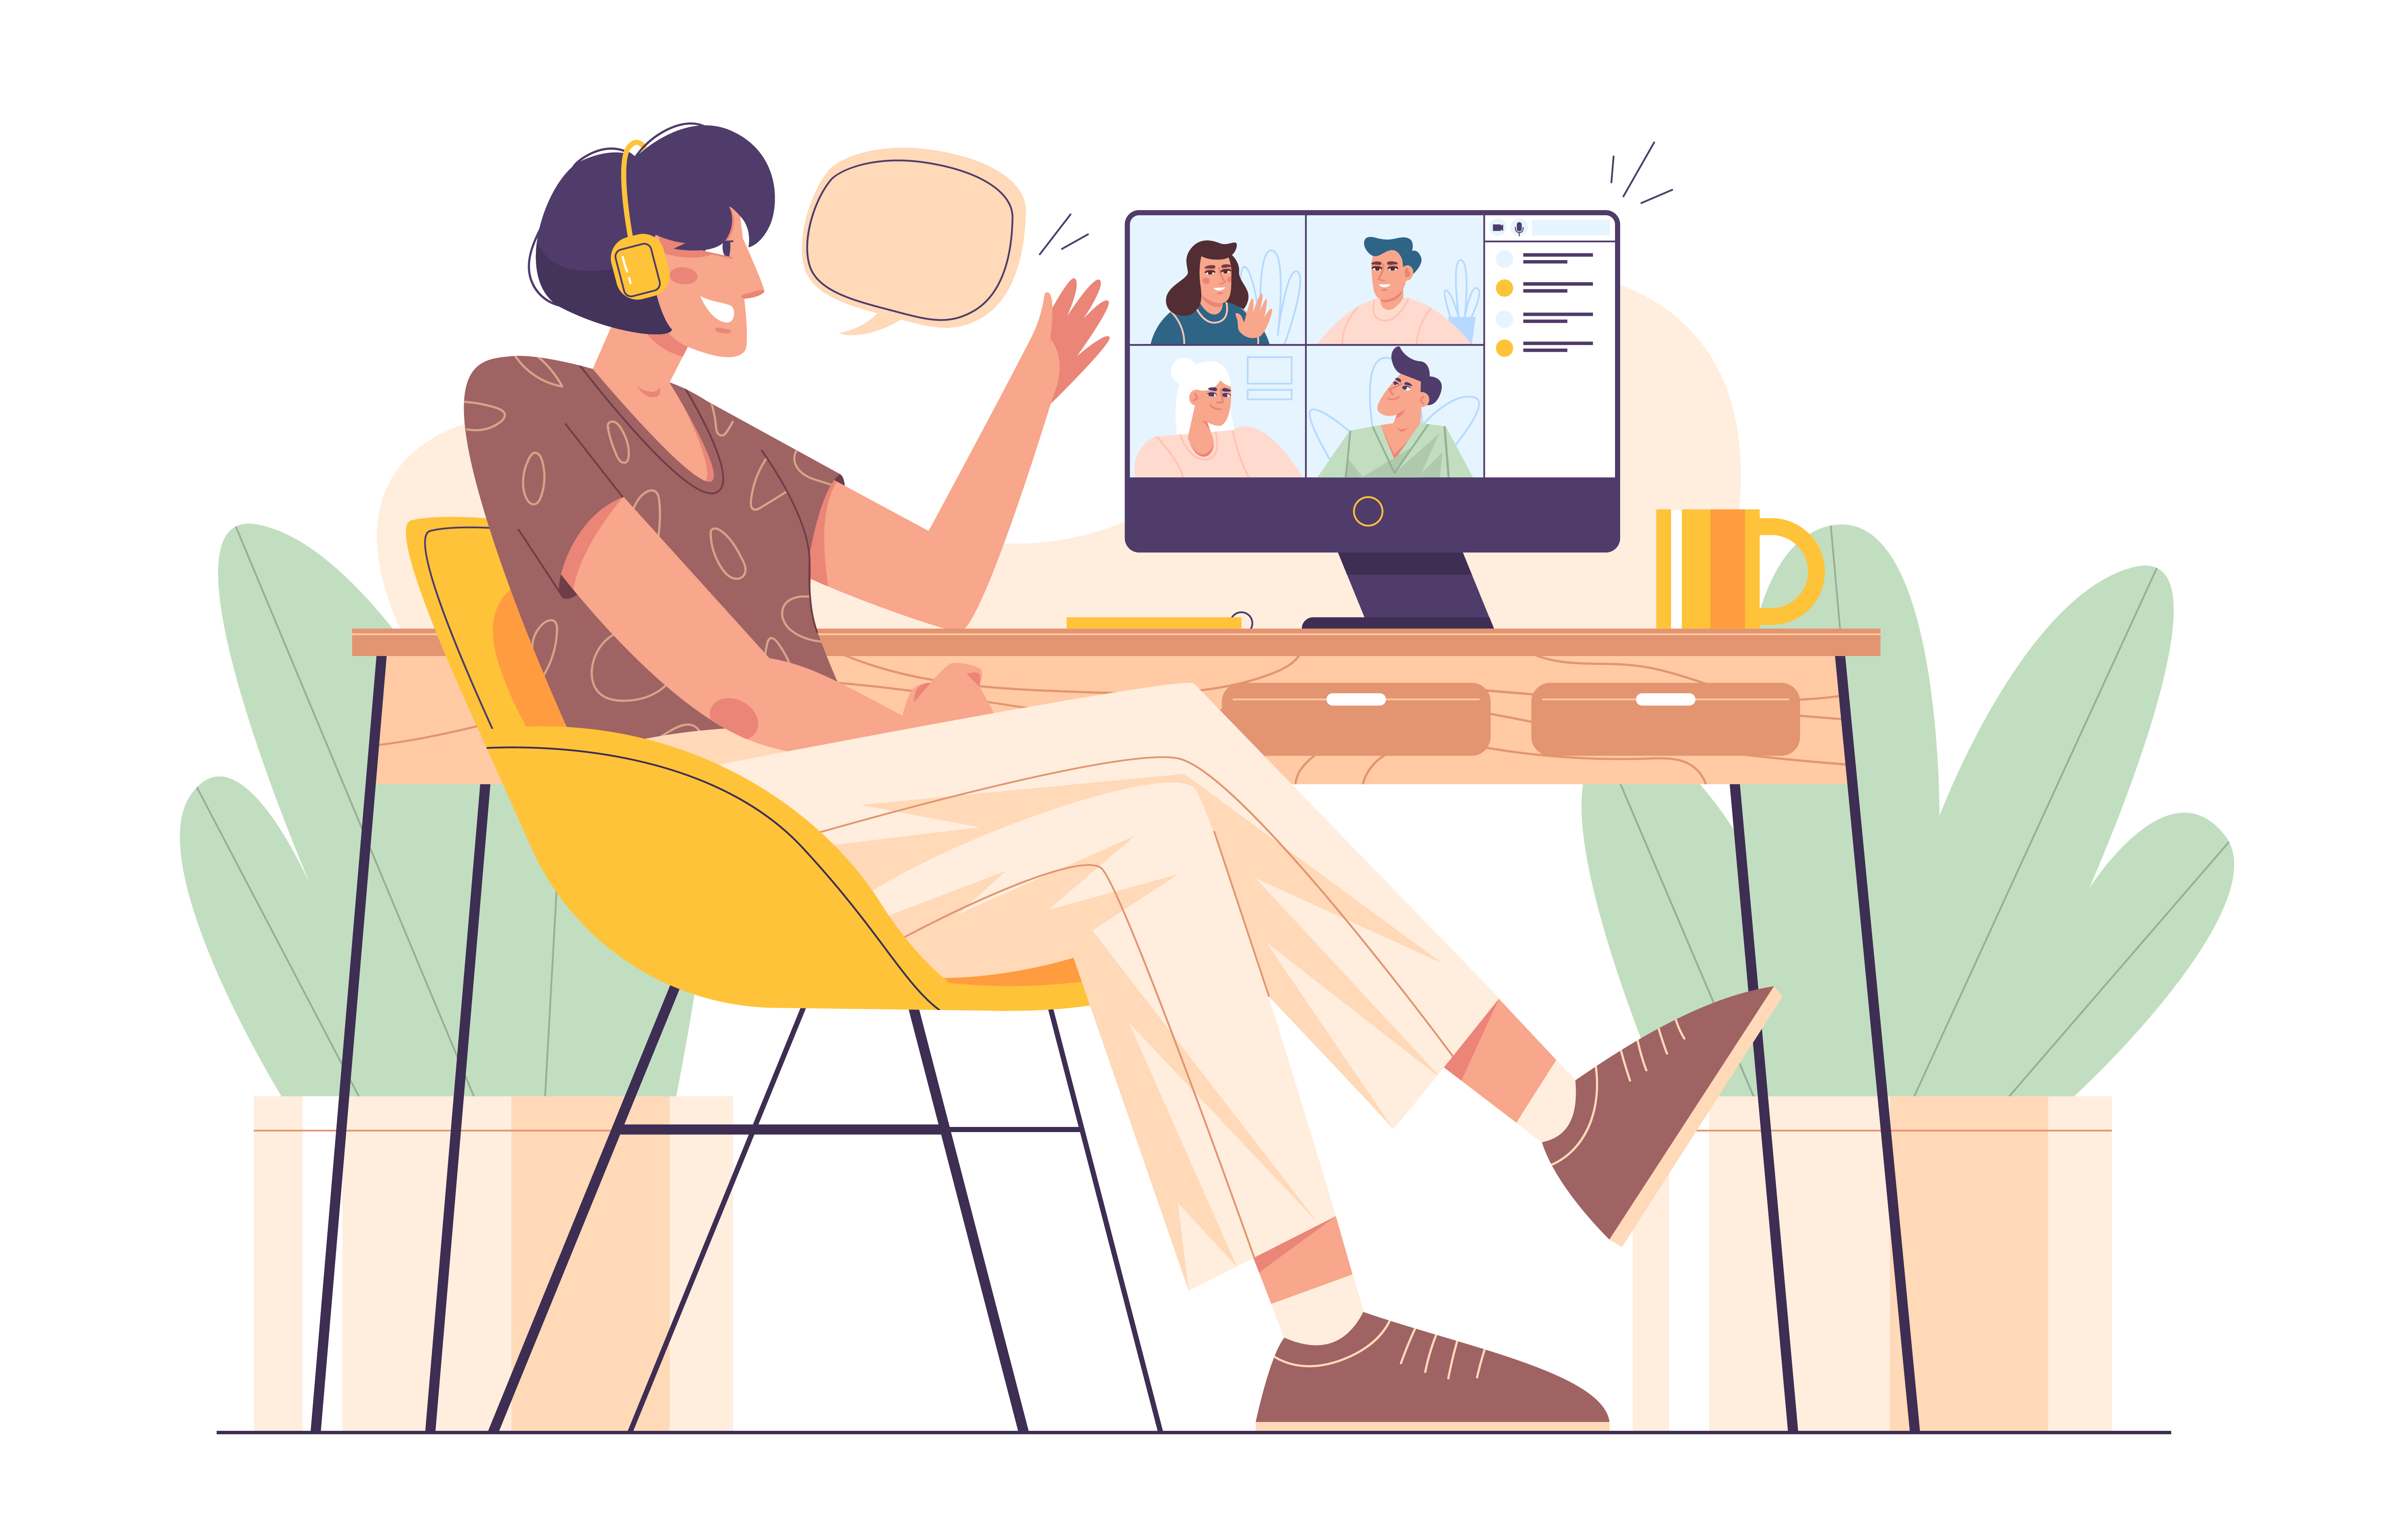

<a href="https://br.freepik.com/fotos-vetores-gratis/fundo">Image created by redgreystock - br.freepik.com</a>

For subscription based businesses, such as Telecom companies, understanding why their clients discontinue their subscription is key for their success. Here we use Telecom users data to understand the reasons behind the Churn rate and make predictions by using different Classification algorithms, techniques to deal with unbalanced datasets, model optimization and other machine learning methods.

## 1. Exploratory analysis

This dataset was obtained from kaggle (https://www.kaggle.com/blastchar/telco-customer-churn). In this stage we will investigate and generate insights of the dataset without using any machine learning techniques.

In [ ]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('telecom_users.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #Total charges was object type

In [ ]:
#Separating into categorical and quantitative variables
quant = df[['tenure',
            'MonthlyCharges',
            'TotalCharges', 
            'Churn']]
            
cat = df[['gender', 
          'SeniorCitizen', 
          'Partner', 
          'Dependents', 
          'PhoneService',
          'MultipleLines',
          'InternetService',
          'OnlineSecurity',
          'OnlineBackup',
          'DeviceProtection',
          'TechSupport',
          'StreamingTV',
          'StreamingMovies',
          'Contract',
          'PaperlessBilling',
          'PaymentMethod',
          'Churn']]

### 1.1 Quantitative Variables

Let's look the the distribution of the quantitative variables of our dataset.

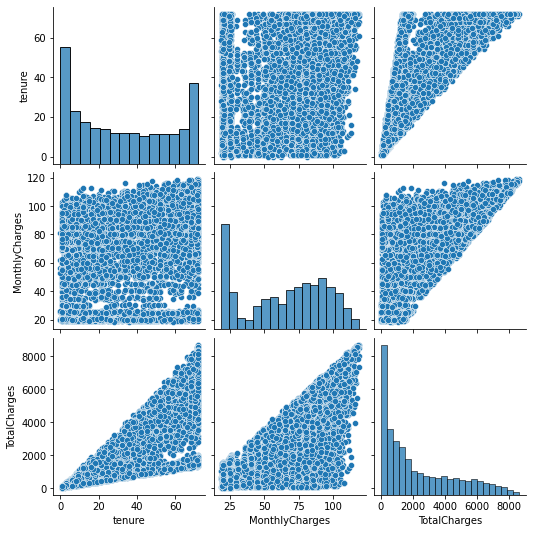

In [ ]:
sns.pairplot(quant)

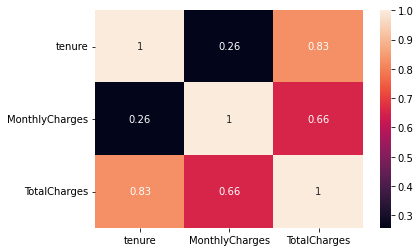

In [ ]:
sns.heatmap(quant.corr(), annot=True, cmap='rocket')

No unexpected correlations were found, the correlation between total charges and tenure, as well as total charges and monthly rates were already expected. Let's see how these variables change the churn rate.

In [ ]:
pd.pivot_table(df, values=['tenure','MonthlyCharges','TotalCharges'], columns=['Churn'])

Churn,No,Yes
MonthlyCharges,61.424506,74.164871
TotalCharges,2568.294874,1550.701985
tenure,37.599682,18.246377


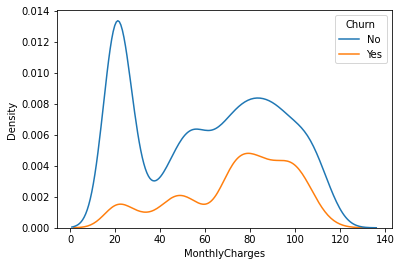

In [ ]:
sns.kdeplot(data = df, x= 'MonthlyCharges', hue = 'Churn')

####Insights:
-Average monthly charges are higher in clients that churn, this may imply that lowerng the charges will reduce the churn.

-However, we can observe a bimodal distribution of the monthly charges that can be due to contract of other more expensive services, such as internet.

Text(0.5, 1.0, 'Clients with internet service')

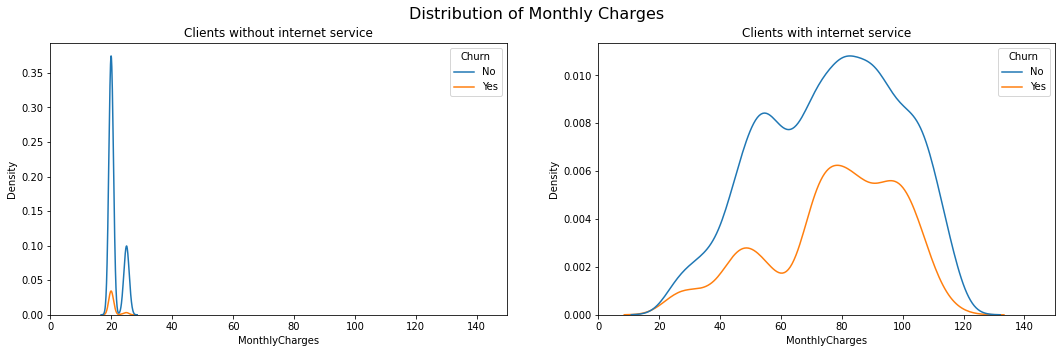

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(18,5))
fig.suptitle('Distribution of Monthly Charges', fontsize=16)

ax1= sns.kdeplot(ax=axes[0], data = df[df['InternetService']== 'No'], x= 'MonthlyCharges', hue = 'Churn')
ax1.set_xlim(0,150)
ax1.set_title('Clients without internet service')

ax2= sns.kdeplot(ax=axes[1], data = df[df['InternetService']!= 'No'], x= 'MonthlyCharges', hue = 'Churn')
ax2.set_xlim(0,150)
ax2.set_title('Clients with internet service')

-Indeed, the bimodal distribution is due to internet service contracts.

-It is also possible to observe that the churn in clients with internet service is more frequent than in those without it.

### 1.2 Categorical Variables:

This dataset has a prevalence of categorical variables, let's explore them to see their impact in the churn rate of clients.

In [ ]:
cat['Churn']=cat['Churn'].replace('Yes',1).replace('No', 0)
#With this the average of the variable 'Churn' will be the proportion of clients that churned.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### 1.2.1 Demographic Variables:

(0.0, 0.5)

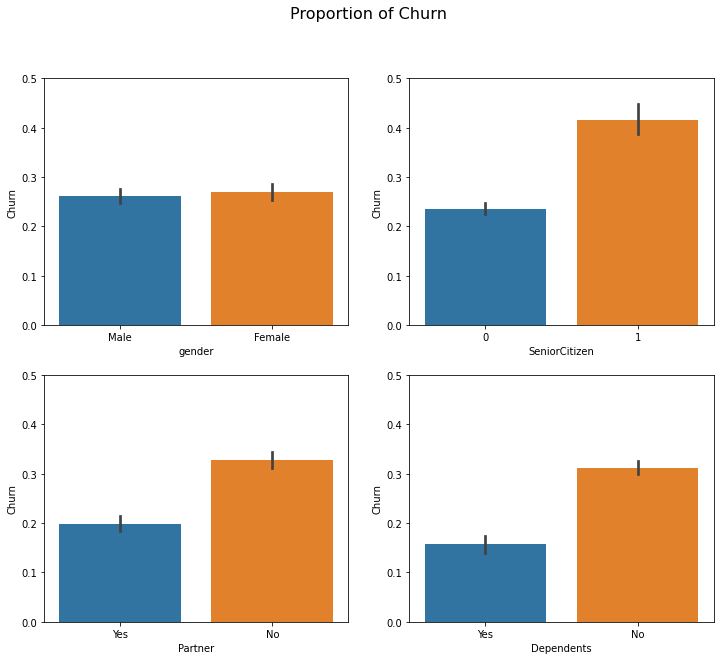

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
fig.suptitle('Proportion of Churn', fontsize=16)

ax1= sns.barplot(ax=axes[0,0], data=cat, y='Churn', x='gender')
ax1.set_ylim(0,0.5)

ax2= sns.barplot(ax=axes[0,1], data=cat, y='Churn', x='SeniorCitizen')
ax2.set_ylim(0,0.5)

ax3= sns.barplot(ax=axes[1,0], data=cat, y='Churn', x='Partner')
ax3.set_ylim(0,0.5)

ax4= sns.barplot(ax=axes[1,1], data=cat, y='Churn', x='Dependents')
ax4.set_ylim(0,0.5)

#####**Insights**:
-Families possess a reduced proportion of Churn.

#### 1.2.2 Services Variables:

(0.0, 0.5)

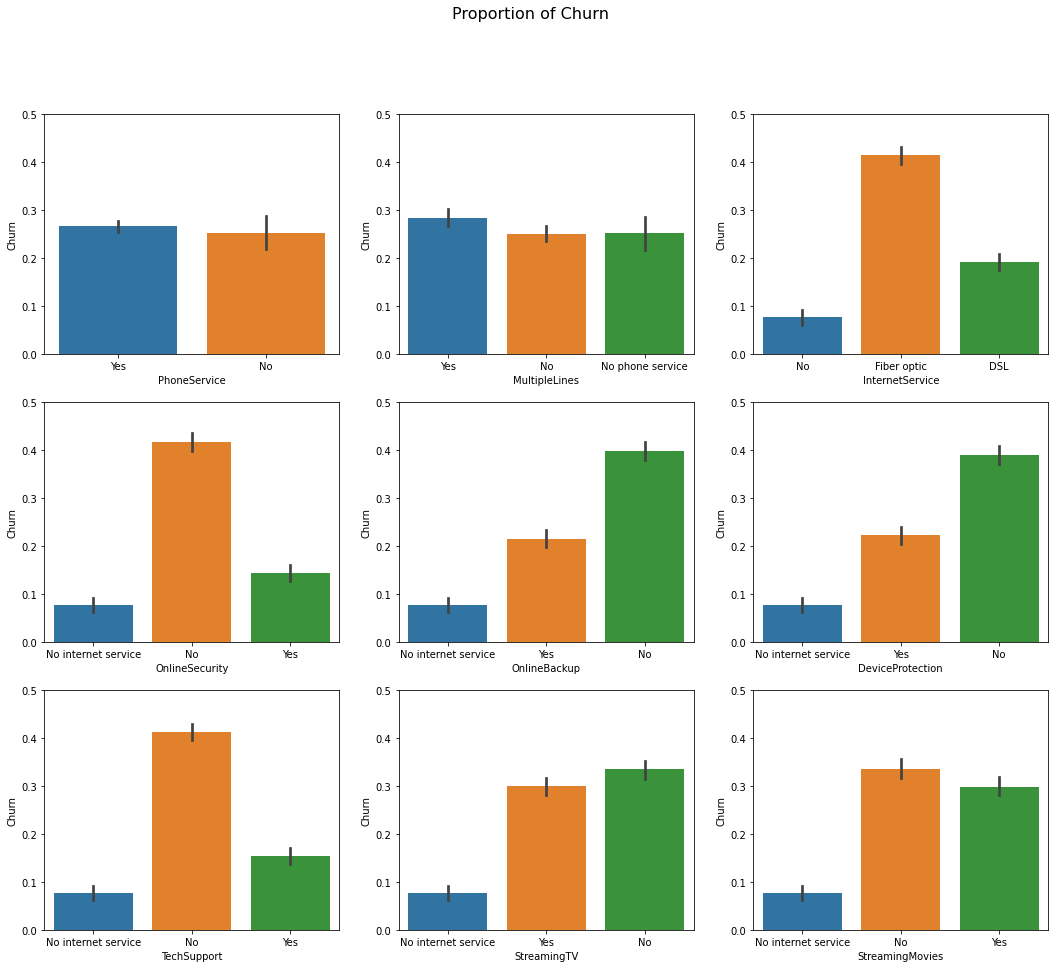

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(18,15))
fig.suptitle('Proportion of Churn', fontsize=16)

ax1= sns.barplot(ax=axes[0,0], data=cat, y='Churn', x='PhoneService')
ax1.set_ylim(0,0.5)

ax2= sns.barplot(ax=axes[0,1], data=cat, y='Churn', x='MultipleLines')
ax2.set_ylim(0,0.5)

ax3= sns.barplot(ax=axes[0,2], data=cat, y='Churn', x='InternetService')
ax3.set_ylim(0,0.5)

ax4= sns.barplot(ax=axes[1,0], data=cat, y='Churn', x='OnlineSecurity')
ax4.set_ylim(0,0.5)

ax5= sns.barplot(ax=axes[1,1], data=cat, y='Churn', x='OnlineBackup')
ax5.set_ylim(0,0.5)

ax6= sns.barplot(ax=axes[1,2], data=cat, y='Churn', x='DeviceProtection')
ax6.set_ylim(0,0.5)

ax7= sns.barplot(ax=axes[2,0], data=cat, y='Churn', x='TechSupport')
ax7.set_ylim(0,0.5)

ax8= sns.barplot(ax=axes[2,1], data=cat, y='Churn', x='StreamingTV')
ax8.set_ylim(0,0.5)

ax9= sns.barplot(ax=axes[2,2], data=cat, y='Churn', x='StreamingMovies')
ax9.set_ylim(0,0.5)


#### **Insights**:
-Clients that do not contract internet service have a reduced proportion of Churn.

-The Churn seem to be reduced when clients sign other services such as Online Security.

Contract/Billing method:

['Credit card (automatic)', 'Bank transfer (automatic)', 'Electronic check', 'Mailed check']


[Text(0, 0, 'Credit card (automatic)'),
 Text(0, 0, 'Bank transfer (automatic)'),
 Text(0, 0, 'Electronic check'),
 Text(0, 0, 'Mailed check')]

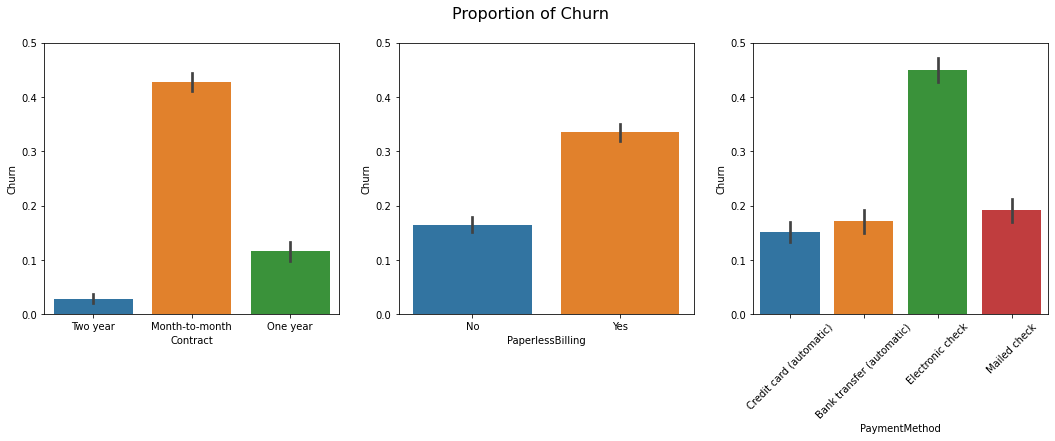

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
fig.suptitle('Proportion of Churn', fontsize=16)

ax1= sns.barplot(ax=axes[0], data=cat, y='Churn', x='Contract')
ax1.set_ylim(0,0.5)

ax2= sns.barplot(ax=axes[1], data=cat, y='Churn', x='PaperlessBilling')
ax2.set_ylim(0,0.5)

my_list=[]
for i in cat['PaymentMethod'].unique():
  my_list.append(i)
print(my_list)
ax3= sns.barplot(ax=axes[2], data=cat, y='Churn', x='PaymentMethod')
ax3.set_ylim(0,0.5)
ax3.set_xticklabels( labels=my_list, rotation=45)

#### **Insights**:
-As expected, longer contracts greatly reduce the proportion of Churn.

-Using Electionic check as payment method increases the proportion of Churn.

## 2. Data Preparation:

Now the the exploratory analysis has been performed, we need to prepare the data to implement the machine learning algorithms.

In [ ]:
# Replacing missing values with the mean

df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [ ]:
#Converting categorical variables into dummy variables

df_dummies=pd.get_dummies(df, columns=list(cat.columns), drop_first=True)
X = df_dummies.iloc[:, 2:-1]
y = df_dummies.iloc[:,-1]

In [ ]:
# Data standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X.iloc[:,:3] = sc.fit_transform(X.iloc[:,:3])

In [ ]:
#Separating data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

## 3. Modeling

### 3.1 Model selection

Now that we are all set for implementing the model let's test 4 different classification algorithms: Random Forest, Logistic Regression, Gaussian Naive Bayes and K-Nearest Neighbors. We will use cross-validation and accuracy score to define the best model.

In [ ]:
#Cross Validation in training dataset
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

random_forest=RandomForestClassifier(random_state=22)
naive_bayes = GaussianNB()
logistic_regression = LogisticRegression(random_state=22)
k_neighbors = KNeighborsClassifier()

models=[random_forest, k_neighbors, naive_bayes, logistic_regression]

for model in models:
  accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv= 10)
  print(str(model), ' Accuracy = {:.2f} %'.format(accuracies.mean()*100))
  print(str(model), ' SD =  {:.2f} %'.format(accuracies.std()*100))

RandomForestClassifier(random_state=22)  Accuracy = 78.74 %
RandomForestClassifier(random_state=22)  SD =  1.23 %
KNeighborsClassifier()  Accuracy = 76.82 %
KNeighborsClassifier()  SD =  1.80 %
GaussianNB()  Accuracy = 66.75 %
GaussianNB()  SD =  2.81 %
LogisticRegression(random_state=22)  Accuracy = 80.14 %
LogisticRegression(random_state=22)  SD =  1.14 %


The logistic regression model presented both the highest accuracy and the lowest standard deviation, however let's see how it will perform in the test data. 



In [ ]:
#Predicting classes in the test set
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for model in models:
  accuracy = []
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))

  print(model , "Accuracy : ", np.mean(accuracy)*100, " %")

RandomForestClassifier(random_state=22) Accuracy :  79.88313856427379  %
KNeighborsClassifier() Accuracy :  74.95826377295492  %
GaussianNB() Accuracy :  68.28046744574291  %
LogisticRegression(random_state=22) Accuracy :  80.63439065108514  %


Once again, the Logistic Regression algorithm showed the best performance, showing that it is the most robust for our analysis.

Nevertheless, since the data has significantly more clients that did not churn than clients that did, let's see if the use of under and oversampling techniques can yield better results.


#### 3.1.2 Testing under and oversampling Techniques
Since the dataset presents unbalanced distribution of instances between both classes, 2 techniques will be used: the Tomek Links undersampling technique and SMOTE oversampling technique.

#####Tomek Links
Now let's see if Tomek Links undersampling technique will improve our predictions

In [ ]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy = 'majority')
X_tomek, y_tomek = tl.fit_resample(X_train, y_train)

In [ ]:
print('WITHOUT BALANCING')
print('Number of Instances: ', X_train.shape[0])
print('% of Churn: ', np.mean(y_train)*100)
print('WITH TOMEK LINKS')
print('Number of Instances: ', X_tomek.shape[0])
print('% of Churn: ', np.mean(y_tomek)*100)

WITHOUT BALANCING
Number of Instances:  4788
% of Churn:  26.336675020885547
WITH TOMEK LINKS
Number of Instances:  4460
% of Churn:  28.27354260089686


As we can see, Tomek Links has removed 328 instances from the majoritary class, making the % of the minoritary class increase from 26 to 28%. Now let's see if this will increase the accuracy of our models.

In [ ]:
#Cross Validation in training dataset

random_forest=RandomForestClassifier(random_state=22)
naive_bayes = GaussianNB()
logistic_regression = LogisticRegression(random_state=22)
k_neighbors = KNeighborsClassifier()

models=[random_forest, k_neighbors, naive_bayes, logistic_regression]

for model in models:
  accuracies = cross_val_score(estimator = model, X = X_tomek, y = y_tomek, cv= 10)
  print(str(model), ' Accuracy = {:.2f} %'.format(accuracies.mean()*100))
  print(str(model), ' SD =  {:.2f} %'.format(accuracies.std()*100))

RandomForestClassifier(random_state=22)  Accuracy = 81.77 %
RandomForestClassifier(random_state=22)  SD =  1.41 %
KNeighborsClassifier()  Accuracy = 79.37 %
KNeighborsClassifier()  SD =  1.82 %
GaussianNB()  Accuracy = 69.33 %
GaussianNB()  SD =  2.57 %
LogisticRegression(random_state=22)  Accuracy = 80.56 %
LogisticRegression(random_state=22)  SD =  0.96 %


In [ ]:
#Predicting classes in the test set
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for model in models:
  accuracy = []
  model.fit(X_tomek, y_tomek)
  y_pred = model.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))

  print(model , "Accuracy : ", np.mean(accuracy)*100, " %")

RandomForestClassifier(random_state=22) Accuracy :  78.96494156928213  %
KNeighborsClassifier() Accuracy :  75.37562604340567  %
GaussianNB() Accuracy :  67.9465776293823  %
LogisticRegression(random_state=22) Accuracy :  80.38397328881469  %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Insights**:

-Despite of the increased performance in the training set, the scores in the test set were slightly lower than what we found without any balancing.

#####SMOTE

Now let's see the effect of oversampling with SMOTE technique

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print('WITHOUT BALANCING')
print('Number of Instances: ', X_train.shape[0])
print('% of Churn: ', np.mean(y_train)*100)
print('WITH SMOTE')
print('Number of Instances: ', X_smote.shape[0])
print('% of Churn: ', np.mean(y_smote)*100)

WITHOUT BALANCING
Number of Instances:  4788
% of Churn:  26.336675020885547
WITH SMOTE
Number of Instances:  7054
% of Churn:  50.0


As we can see, SMOTE has increased the number of instances in the minoritary class. Now both classes have the same number of instances.

In [ ]:
#Cross Validation in training dataset

random_forest=RandomForestClassifier(random_state=22)
naive_bayes = GaussianNB()
logistic_regression = LogisticRegression(random_state=22)
k_neighbors = KNeighborsClassifier()

models=[random_forest, k_neighbors, naive_bayes, logistic_regression]

for model in models:
  accuracies = cross_val_score(estimator = model, X = X_smote, y = y_smote, cv= 10)
  print(str(model), ' Accuracy = {:.2f} %'.format(accuracies.mean()*100))
  print(str(model), ' SD =  {:.2f} %'.format(accuracies.std()*100))

RandomForestClassifier(random_state=22)  Accuracy = 84.37 %
RandomForestClassifier(random_state=22)  SD =  4.00 %
KNeighborsClassifier()  Accuracy = 80.75 %
KNeighborsClassifier()  SD =  2.29 %
GaussianNB()  Accuracy = 74.70 %
GaussianNB()  SD =  1.46 %
LogisticRegression(random_state=22)  Accuracy = 79.72 %
LogisticRegression(random_state=22)  SD =  4.09 %


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Predicting classes in the test set
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

for model in models:
  accuracy = []
  model.fit(X_smote, y_smote)
  y_pred = model.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred))

  print(model , "Accuracy : ", np.mean(accuracy)*100, " %")

RandomForestClassifier(random_state=22) Accuracy :  78.63105175292154  %
KNeighborsClassifier() Accuracy :  71.11853088480802  %
GaussianNB() Accuracy :  71.03505843071787  %
LogisticRegression(random_state=22) Accuracy :  76.96160267111853  %


**Insights**:

-Similarly to the Tomek Links method, despite of the increased performance in the training set, the scores in the test set were lower than the ones observed without any balancing. Therefore balancing techniques should be used.

-The highest accuracy was obtained in the linear regression model.

### 3.2 Model Optimization

Logistic Regression presented the highest Accuracy and should be the model of choice for predicting clients that are more likely to churn. Now, we will find the best parameters for the model.

In [ ]:
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression(random_state=22, max_iter=2000)

parameters = [{'penalty': ['elasticnet'], 
               'C': np.arange(0.1, 100, 10), 
               'class_weight': ['None', 'balanced'], 
               'solver': ['saga'], 
               'l1_ratio': np.arange(0, 1, 10)},
              {'penalty': ['none'], 
               'class_weight': ['None', 'balanced'], 
               'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
              {'penalty': ['l2']}]
               
grid_search = GridSearchCV(estimator= logistic_regression, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 80.14 %
Best Parameters: {'penalty': 'l2'}


The default model, with l2 penalty, was the one with the highest accuracy. Let's see if different alphas of the Ridge classifier (that uses L2 penalty) will present a higher accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

ridge_classifier = RidgeClassifier(random_state=22)

parameters = [{'alpha':np.arange(0, 5,20)}]
grid_search = GridSearchCV(estimator= ridge_classifier, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 78.22 %
Best Parameters: {'alpha': 0}


The Ridge classifier that showed the highest accuracy was the one with zero alpha, meaning no L2 penalty. Nevertheless, this model still scored worse than the previous logistic regression.

In [ ]:
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(model , "Accuracy : ", accuracy*100, "%")

LogisticRegression(random_state=22) Accuracy :  80.63439065108514 %


Interestingly, the model with highest accuracy of all was the default sklearn linear regression, with an accuracy of 80.6%

## 4. Exploring the coefficients of the model

One great quality of the linear regression model is its great explicability, meaning that we can easily understand which of the attributes had a higher impact in the algorithm's decision.

In [ ]:
coeficients = logistic_regression.coef_[0]
coef_df = pd.DataFrame(coeficients, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef_df

,coef
InternetService_Fiber optic,0.866892
TotalCharges,0.640014
StreamingMovies_Yes,0.356301
PaymentMethod_Electronic check,0.335663
PaperlessBilling_Yes,0.312212
MultipleLines_No phone service,0.280506
MultipleLines_Yes,0.268263
StreamingTV_Yes,0.240324
SeniorCitizen_1,0.177314
Partner_Yes,0.008161


####Insights:
-Observing the coefficients with higher impact in the model some features should be highlighted:

  >Clients that have the **Optic Fiber service** and clients that have **Electronic check** as payment method are more likely to Churn;

  >Clients that sign **longer contracts** and  **Online Security and Tech Support** services are less likely to Churn.

#5. Conclusions

-Logistic regression is the best model for predicting the Churn.

-An internal assessment should be conducted to undestand why the Optic Fiber service is increasing the Churn. Efforts focusing on increasing the quality of this service or reducing the prices are options that should be considered.

-Encouraging clients to choose payment methods that are not Electronic check are also actions that could reduce the Churn.

-Making special offers for contracts with longer duration and for services such as Online Security and Tech Support should also be considered, since they are associated with a reduction in Churn.